In [8]:
import pandas as pd
% pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [60]:

df = pd.load( 'dfBehavKARSAll.p')

In [61]:
dfOlderBL = df[(df.condLab == 0) & (df.age > 11)]
dfOlderBL.ix[ df.age> 40, 'isAdult' ] = 1
dfOlderBL.ix[ df.age < 40, 'isAdult' ] = 0

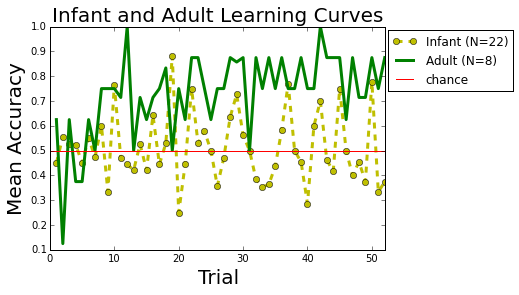

In [68]:
dfAgg  = dfOlderBL.groupby( [ 'isAdult', 'trial']).mean().reset_index()

labs = ['Infant', 'Adult']
tickStyle = ['y--o', 'g-' ]
for age in [0,1]:
    grp = dfAgg[ dfAgg.isAdult == age]
    N = len(dfOlderBL[dfOlderBL.isAdult == age ].subid.unique())
    plot( grp.trial, grp.acc, tickStyle[age], linewidth=3, label=(labs[age]+' (N=%d)'%N) )
    
plot( np.arange(53), .5*ones(53), 'r-', label='chance')    
lgd = legend(bbox_to_anchor=(1.4, 1.01))
ylabel( 'Mean Accuracy', fontsize=20)
xlabel( 'Trial', fontsize=20)
xlim([0,52])
title( 'Infant and Adult Learning Curves', fontsize=20)
savefig('baseline15monUpAndAdult.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [63]:

dfOlderBL.age.unique()

array([ 16,  24,  22,  12,  18,  15,  20,  21, 432])